### 🔎 HIPÓTESIS 5
#### "¿Las películas con más actores principales son mejor valoradas?"

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leemos el archivo con datos de casting
casting_df = pd.read_csv("dataF/AllMoviesCastingRaw.csv", sep=";")

# Leemos el archivo de películas y lo llamamos 'tmdb_df'
tmdb_df = pd.read_csv("dataF/tmdb_5000_movies.csv")

# Mostramos la información del DataFrame de casting
print("📄 Información de 'casting_df':")
casting_df.info()

print("\n" + "-"*80 + "\n")

# Mostramos la información del DataFrame de películas
print("🎬 Información de 'tmdb_df':")
tmdb_df.info()


📄 Información de 'casting_df':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329044 entries, 0 to 329043
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               329044 non-null  int64  
 1   actor1_name      329044 non-null  object 
 2   actor1_gender    329044 non-null  int64  
 3   actor2_name      329044 non-null  object 
 4   actor2_gender    329043 non-null  float64
 5   actor3_name      329044 non-null  object 
 6   actor3_gender    329044 non-null  int64  
 7   actor4_name      329044 non-null  object 
 8   actor4_gender    329044 non-null  int64  
 9   actor5_name      329044 non-null  object 
 10  actor5_gender    329044 non-null  int64  
 11  actor_number     329044 non-null  int64  
 12  director_name    329044 non-null  object 
 13  director_gender  329043 non-null  float64
 14  director_number  329044 non-null  int64  
 15  producer_name    329044 non-null  object 
 16  produce

In [3]:
 #Vamos a comprobar si los id del tmdb_df también aparecen en casting_df y si están 
 # duplicados allí

# Contamos cuántas veces aparece cada 'id' en casting_df
conteo_ids_casting = casting_df['id'].value_counts()

# Mostramos cuántos ids tienen más de una fila en casting_df
print("Número de ids duplicados en casting_df:", (conteo_ids_casting > 1).sum())

# Y cuántos hay en total en tmdb_df
print("Número total de películas en tmdb_df:", tmdb_df['id'].nunique())


Número de ids duplicados en casting_df: 0
Número total de películas en tmdb_df: 4803


Tenemos que comprobar si los id de un data y del otro hacen referencia a las mismas películas, para ello mergeamos ambos datas por la columna id de cada uno para comprobar si hay correspondecia entre sus id y las pelis de tmbd

In [4]:
# Extraemos solo la columna 'id' del DataFrame de casting
# Así creamos una versión más pequeña que solo tiene los identificadores
casting_temp = casting_df[['id']]

# Extraemos del DataFrame tmdb_df las columnas 'id' y 'title'
# 'title' contiene el nombre de la película, que usaremos para comprobar si los ids coinciden con los títulos
tmdb_temp = tmdb_df[['id', 'title']]

# Hacemos una unión (merge) de los dos DataFrames por la columna 'id'
# 'inner' significa que solo se incluirán los ids que existan en ambos DataFrames
comparacion = pd.merge(casting_temp, tmdb_temp, on="id", how="inner")

# Mostramos las primeras 10 filas del resultado
# Esto nos permitirá ver qué títulos hay para los ids que existen en ambos archivos
print(comparacion.head(10))


   id                                              title
0   5                                         Four Rooms
1  11                                          Star Wars
2  12                                       Finding Nemo
3  13                                       Forrest Gump
4  14                                    American Beauty
5  16                                 Dancer in the Dark
6  18                                  The Fifth Element
7  19                                         Metropolis
8  20                                 My Life Without Me
9  22  Pirates of the Caribbean: The Curse of the Bla...


¿Y si los id de casting_df son simplemente números secuenciales (1, 2, 3...) sin relación real con los id de tmdb_df, que también tienen números parecidos? ¿Cómo sabemos que ambos están hablando de la misma película y no que simplemente se llaman igual por casualidad?

 ¿Cómo lo comprobamos de verdad?
comparamos más campos además del id y el title, por ejemplo, actores.
Revisamos si los actores que aparecen están relacionados con el título de la película.

Por ejemplo:

Si en la fila de Star Wars aparecen actores como Mark Hamill o Harrison Ford, entonces es evidente que sí están vinculados correctamente.

Pero si Finding Nemo tiene actores reales como Bruce Willis, entonces algo no cuadra.

In [5]:
# Seleccionamos columnas de interés del DataFrame de casting
# Para ver qué actores están en cada id
casting_verificacion = casting_df[['id', 'actor1_name', 'actor2_name', 'actor3_name']]

# Hacemos un merge con tmdb_df para obtener el título de la película
verificacion_completa = pd.merge(casting_verificacion, tmdb_df[['id', 'title']], on='id', how='inner')

# Mostramos algunas filas
verificacion_completa.head(50)


,id,actor1_name,actor2_name,actor3_name,title
0,5,Tim Roth,Antonio Banderas,Jennifer Beals,Four Rooms
1,11,Mark Hamill,Harrison Ford,Carrie Fisher,Star Wars
2,12,Albert Brooks,Ellen DeGeneres,Alexander Gould,Finding Nemo
3,13,Tom Hanks,Robin Wright,Gary Sinise,Forrest Gump
4,14,Kevin Spacey,Annette Bening,Thora Birch,American Beauty
5,16,Björk,Catherine Deneuve,David Morse,Dancer in the Dark
6,18,Bruce Willis,Gary Oldman,Ian Holm,The Fifth Element
7,19,Brigitte Helm,Alfred Abel,Gustav Fröhlich,Metropolis
8,20,Sarah Polley,Amanda Plummer,Scott Speedman,My Life Without Me
9,22,Johnny Depp,Geoffrey Rush,Orlando Bloom,Pirates of the Caribbean: The Curse of the Bla...


Esto no puede ser una coincidencia aleatoria. Los actores coinciden perfectamente con los títulos de películas mundialmente conocidas. Es decir:

El id 11 representa claramente Star Wars, y están los 3 protagonistas originales.

El id 12 representa Finding Nemo, y tiene las voces protagonistas.

El id 13 representa Forrest Gump, y tiene también los 3 protagonistas originales

El id 22 representa Pirates of the Caribbean, con el reparto esperable.

Así como con las otras pelis


In [6]:
# Paso 1: Extraemos las columnas que necesitamos de cada DataFrame
# Del DataFrame de casting nos quedamos con 'id' y 'actor_number'
casting_reducido = casting_df[['id', 'actor_number']]

# Del DataFrame tmdb_df nos quedamos con 'id', 'title' y 'vote_average'
tmdb_reducido = tmdb_df[['id', 'title', 'vote_average']]

# Paso 2: Unimos ambos DataFrames por 'id'
# Solo conservará las películas que existan en los dos archivos
dfs_combinados = pd.merge(casting_reducido, tmdb_reducido, on='id', how='inner')

# Paso 3: Mostramos la información del nuevo DataFrame
print(" Información del nuevo DataFrame combinado:")
dfs_combinados.info()

# Paso 4: Mostramos las primeras filas para ver cómo ha quedado
print("\n Primeras filas del nuevo DataFrame:")
dfs_combinados.head()


 Información del nuevo DataFrame combinado:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4777 entries, 0 to 4776
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4777 non-null   int64  
 1   actor_number  4777 non-null   int64  
 2   title         4777 non-null   object 
 3   vote_average  4777 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 149.4+ KB

 Primeras filas del nuevo DataFrame:


,id,actor_number,title,vote_average
0,5,24,Four Rooms,6.5
1,11,106,Star Wars,8.1
2,12,24,Finding Nemo,7.6
3,13,67,Forrest Gump,8.2
4,14,41,American Beauty,7.9


❌ Problema actual
La columna actor_number en casting_df contiene valores muy altos, como 106 o 67. Es evidente que eso no puede ser el número de actores principales, sino probablemente el número total de personas del reparto.

Entonces, no podemos usar la columna "actor_number" como medida fiable del número de protagonistas. En cambio, tenemos directamente los nombres de los actores principales en las columnas:

actor1_name, actor2_name, actor3_name, actor4_name, actor5_name.

Estas columnas sí representan a los actores más importantes de cada película (como ya hemos comprobado al ver títulos y nombres como Tom Hanks, Julia Roberts, etc.).

Solución: contar cuántos actores principales hay (de 1 a 5) en esas columnas

Objetivo:
Crear una nueva columna llamada "n_act", que cuente cuántos de los campos actor1_name, actor2_name, ..., actor5_name no están vacíos o no son "none". Para ello primero creamos un nuevo data "actores_df" con la columna id y las de los actores.

In [7]:
# Creamos una lista con los nombres de las columnas que queremos conservar
columnas_actores = ['id', 'actor1_name', 'actor2_name', 'actor3_name', 'actor4_name', 'actor5_name']

# Creamos una copia del DataFrame casting_df con solo esas columnas
actores_df = casting_df[columnas_actores].copy()

# Mostramos las primeras 25 filas del nuevo DataFrame para ver cómo están los datos
print("🎬 Primeras 25 filas del DataFrame 'actores_df':")
actores_df.head(25)


🎬 Primeras 25 filas del DataFrame 'actores_df':


,id,actor1_name,actor2_name,actor3_name,actor4_name,actor5_name
0,2,Turo Pajala,Susanna Haavisto,Matti Pellonpää,Eetu Hilkamo,none
1,3,Matti Pellonpää,Kati Outinen,Sakari Kuosmanen,Esko Nikkari,Kylli Köngäs
2,5,Tim Roth,Antonio Banderas,Jennifer Beals,Madonna,Marisa Tomei
3,6,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,Jeremy Piven,Peter Greene
4,8,none,none,none,none,none
5,9,Rita Lengyel,Milton Welsh,none,none,none
6,11,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness
7,12,Albert Brooks,Ellen DeGeneres,Alexander Gould,Willem Dafoe,Brad Garrett
8,13,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Sally Field
9,14,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,Mena Suvari


Observamos que hay columnas con valores None y queremos poder contar cuántos actores reales hay en cada fila. Para esto, convertimos "none" en  "NaN" ("Not a Number" valor especial que Python entiende como "vacío"). Así después podemos usar .notna() para contar los que sí están presentes.

In [8]:
# Vamos a reemplazar el texto 'none' por valores nulos (NaN) en las columnas de actores
# Esto nos permitirá luego contar cuántos actores reales tiene cada película

# Aplicamos esto solo a las columnas actor1_name a actor5_name (excluimos 'id')
columnas_nombres = ['actor1_name', 'actor2_name', 'actor3_name', 'actor4_name', 'actor5_name']

# Usamos un bucle para recorrer cada columna y hacer el reemplazo
for columna in columnas_nombres:
    actores_df[columna] = actores_df[columna].replace('none', pd.NA)

# Mostramos de nuevo las 25 primeras filas para comprobar que ya no aparece 'none'
print("Revisión después de reemplazar 'none' por NaN:")
actores_df.head(25)


Revisión después de reemplazar 'none' por NaN:


,id,actor1_name,actor2_name,actor3_name,actor4_name,actor5_name
0,2,Turo Pajala,Susanna Haavisto,Matti Pellonpää,Eetu Hilkamo,<NA>
1,3,Matti Pellonpää,Kati Outinen,Sakari Kuosmanen,Esko Nikkari,Kylli Köngäs
2,5,Tim Roth,Antonio Banderas,Jennifer Beals,Madonna,Marisa Tomei
3,6,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,Jeremy Piven,Peter Greene
4,8,<NA>,<NA>,<NA>,<NA>,<NA>
5,9,Rita Lengyel,Milton Welsh,<NA>,<NA>,<NA>
6,11,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness
7,12,Albert Brooks,Ellen DeGeneres,Alexander Gould,Willem Dafoe,Brad Garrett
8,13,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Sally Field
9,14,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,Mena Suvari


En el nuevo data "actores_df" crearmos una nueva columna llamada "n_act", que cuente cuántos de los campos actor1_name, actor2_name, ..., actor5_name no están vacíos o no son "none".

In [9]:
# Paso 1: Seleccionamos solo las columnas que contienen los nombres de actores principales
columnas_nombres = ['actor1_name', 'actor2_name', 'actor3_name', 'actor4_name', 'actor5_name']

# Paso 2: Creamos una nueva columna que contará cuántos de esos campos NO están vacíos (no son NaN)
# .notna() devuelve True donde hay valor, y False donde hay vacío
# .sum(axis=1) suma los True en cada fila (True cuenta como 1)
actores_df['n_act'] = actores_df[columnas_nombres].notna().sum(axis=1)

# Paso 3: Mostramos algunas filas para comprobar que la nueva columna se ha añadido correctamente
print("📊 Recuento de actores principales por película:")
actores_df.head(25)


📊 Recuento de actores principales por película:


,id,actor1_name,actor2_name,actor3_name,actor4_name,actor5_name,n_act
0,2,Turo Pajala,Susanna Haavisto,Matti Pellonpää,Eetu Hilkamo,<NA>,4
1,3,Matti Pellonpää,Kati Outinen,Sakari Kuosmanen,Esko Nikkari,Kylli Köngäs,5
2,5,Tim Roth,Antonio Banderas,Jennifer Beals,Madonna,Marisa Tomei,5
3,6,Emilio Estevez,Cuba Gooding Jr.,Denis Leary,Jeremy Piven,Peter Greene,5
4,8,<NA>,<NA>,<NA>,<NA>,<NA>,0
5,9,Rita Lengyel,Milton Welsh,<NA>,<NA>,<NA>,2
6,11,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,5
7,12,Albert Brooks,Ellen DeGeneres,Alexander Gould,Willem Dafoe,Brad Garrett,5
8,13,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Sally Field,5
9,14,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,Mena Suvari,5


Mergeamos actores_df y tmbd_reducido

In [10]:

# Paso 3: Unimos ambos DataFrames por la columna 'id'
dfs_unidos = pd.merge(actores_df, tmdb_reducido, on='id', how='inner')

# Paso 4: Mostramos información básica del DataFrame final
print("ℹ️ Información del DataFrame 'dfs_unidos':")
dfs_unidos.info()

# Paso 5: Mostramos las primeras filas para comprobar que se ha unido bien
print("\n📄 Primeras 25 filas del DataFrame combinado:")
dfs_unidos.head(25)


ℹ️ Información del DataFrame 'dfs_unidos':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4777 entries, 0 to 4776
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4777 non-null   int64  
 1   actor1_name   4552 non-null   object 
 2   actor2_name   4682 non-null   object 
 3   actor3_name   4668 non-null   object 
 4   actor4_name   4629 non-null   object 
 5   actor5_name   4579 non-null   object 
 6   n_act         4777 non-null   int64  
 7   title         4777 non-null   object 
 8   vote_average  4777 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 336.0+ KB

📄 Primeras 25 filas del DataFrame combinado:


,id,actor1_name,actor2_name,actor3_name,actor4_name,actor5_name,n_act,title,vote_average
0,5,Tim Roth,Antonio Banderas,Jennifer Beals,Madonna,Marisa Tomei,5,Four Rooms,6.5
1,11,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,5,Star Wars,8.1
2,12,Albert Brooks,Ellen DeGeneres,Alexander Gould,Willem Dafoe,Brad Garrett,5,Finding Nemo,7.6
3,13,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Sally Field,5,Forrest Gump,8.2
4,14,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,Mena Suvari,5,American Beauty,7.9
5,16,Björk,Catherine Deneuve,David Morse,Peter Stormare,Joel Grey,5,Dancer in the Dark,7.6
6,18,Bruce Willis,Gary Oldman,Ian Holm,Milla Jovovich,Chris Tucker,5,The Fifth Element,7.3
7,19,Brigitte Helm,Alfred Abel,Gustav Fröhlich,Rudolf Klein-Rogge,Fritz Rasp,5,Metropolis,8.0
8,20,Sarah Polley,Amanda Plummer,Scott Speedman,Leonor Watling,Deborah Harry,5,My Life Without Me,7.2
9,22,Johnny Depp,Geoffrey Rush,Orlando Bloom,Keira Knightley,Jack Davenport,5,Pirates of the Caribbean: The Curse of the Bla...,7.5


In [11]:
# Definimos el nuevo orden de columnas
nuevo_orden_columnas = [
    'id', 'title',                      # Primero el identificador y el título
    'actor1_name', 'actor2_name',       # Luego los actores
    'actor3_name', 'actor4_name', 'actor5_name',
    'n_act',            # Después el número de actores principales
    'vote_average'                      # Y por último la valoración
]

# Reordenamos el DataFrame usando la lista anterior
dfs_unidos = dfs_unidos[nuevo_orden_columnas]

# Mostramos las primeras filas para comprobar que se ha hecho correctamente
print("✅ Columnas reordenadas:")
dfs_unidos.head(5)


✅ Columnas reordenadas:


,id,title,actor1_name,actor2_name,actor3_name,actor4_name,actor5_name,n_act,vote_average
0,5,Four Rooms,Tim Roth,Antonio Banderas,Jennifer Beals,Madonna,Marisa Tomei,5,6.5
1,11,Star Wars,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,5,8.1
2,12,Finding Nemo,Albert Brooks,Ellen DeGeneres,Alexander Gould,Willem Dafoe,Brad Garrett,5,7.6
3,13,Forrest Gump,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Sally Field,5,8.2
4,14,American Beauty,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,Mena Suvari,5,7.9


In [12]:
# Cambiamos el nombre de la columna 'vote_average' por 'vot_av'
dfs_unidos = dfs_unidos.rename(columns={'vote_average': 'vot_av'})

# Mostramos las primeras filas para confirmar el cambio
print("✅ Cambio de nombre aplicado. Vista previa:")
dfs_unidos.head(5)


✅ Cambio de nombre aplicado. Vista previa:


,id,title,actor1_name,actor2_name,actor3_name,actor4_name,actor5_name,n_act,vot_av
0,5,Four Rooms,Tim Roth,Antonio Banderas,Jennifer Beals,Madonna,Marisa Tomei,5,6.5
1,11,Star Wars,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,5,8.1
2,12,Finding Nemo,Albert Brooks,Ellen DeGeneres,Alexander Gould,Willem Dafoe,Brad Garrett,5,7.6
3,13,Forrest Gump,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Sally Field,5,8.2
4,14,American Beauty,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,Mena Suvari,5,7.9


In [13]:

dfs_unidos.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4777 entries, 0 to 4776
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4777 non-null   int64  
 1   title        4777 non-null   object 
 2   actor1_name  4552 non-null   object 
 3   actor2_name  4682 non-null   object 
 4   actor3_name  4668 non-null   object 
 5   actor4_name  4629 non-null   object 
 6   actor5_name  4579 non-null   object 
 7   n_act        4777 non-null   int64  
 8   vot_av       4777 non-null   float64
dtypes: float64(1), int64(2), object(6)
memory usage: 336.0+ KB


---
LIMPIEZA DE DFS_UNIDOS

In [14]:
# 🎭 Paso 1: Filtramos las películas que tienen 0 actores principales
peliculas_sin_actores = dfs_unidos[dfs_unidos['n_act'] == 0]

# Mostramos cuántas son
print(f"🎭 Número de películas sin actores principales: {len(peliculas_sin_actores)}")

# Mostramos las primeras filas para inspección
peliculas_sin_actores.head(10)


🎭 Número de películas sin actores principales: 45


,id,title,actor1_name,actor2_name,actor3_name,actor4_name,actor5_name,n_act,vot_av
2017,11658,Tae Guk Gi: The Brotherhood of War,<NA>,<NA>,<NA>,<NA>,<NA>,0,7.4
2366,14358,Mad Hot Ballroom,<NA>,<NA>,<NA>,<NA>,<NA>,0,7.2
2586,17644,Barney's Great Adventure,<NA>,<NA>,<NA>,<NA>,<NA>,0,2.9
3184,37985,The Trials Of Darryl Hunt,<NA>,<NA>,<NA>,<NA>,<NA>,0,6.8
3219,38786,The Blood of My Brother: A Story of Death in Iraq,<NA>,<NA>,<NA>,<NA>,<NA>,0,0.0
3333,43630,The Helix... Loaded,<NA>,<NA>,<NA>,<NA>,<NA>,0,4.8
3335,43743,Fabled,<NA>,<NA>,<NA>,<NA>,<NA>,0,0.0
3430,47546,I Want Your Money,<NA>,<NA>,<NA>,<NA>,<NA>,0,3.8
3492,50135,Animals United,<NA>,<NA>,<NA>,<NA>,<NA>,0,5.5
3674,64973,"Peace, Propaganda & the Promised Land",<NA>,<NA>,<NA>,<NA>,<NA>,0,6.4


In [15]:
# Paso 1: Filtramos las películas con valoración igual a 0
peliculas_con_valoracion_cero = dfs_unidos[dfs_unidos['vot_av'] == 0]

# Paso 2: Contamos cuántas hay
cantidad_valoracion_cero = len(peliculas_con_valoracion_cero)
print(f"🎯 Películas con valoración 0: {cantidad_valoracion_cero}")

# Paso 3 (opcional): Vemos algunas de ellas para entender el tipo de películas que son
print(peliculas_con_valoracion_cero[['title', 'vot_av']].head(10))


🎯 Películas con valoración 0: 62
                                                  title  vot_av
3219  The Blood of My Brother: A Story of Death in Iraq     0.0
3335                                             Fabled     0.0
3406                                               Rust     0.0
3486                               Certifiably Jonathan     0.0
3524                                         Hav Plenty     0.0
3714                            The Legend of God's Gun     0.0
3728                           The Harvest (La Cosecha)     0.0
3772                                Dil Jo Bhi Kahey...     0.0
3844                                Four Single Fathers     0.0
4020                               Should've Been Romeo     0.0


In [17]:
# Creamos un nuevo DataFrame filtrado: sin películas con 0 actores ni votación 0
dfs_limpio = dfs_unidos[(dfs_unidos['n_act'] > 0) & (dfs_unidos['vot_av'] > 0)]

# Mostramos cuántas películas quedan tras limpiar
print(f"✅ Películas disponibles para análisis después de limpiar: {len(dfs_limpio)}")

# Mostramos una vista previa para confirmar que todo está en orden
dfs_limpio.head(10)


✅ Películas disponibles para análisis después de limpiar: 4688


,id,title,actor1_name,actor2_name,actor3_name,actor4_name,actor5_name,n_act,vot_av
0,5,Four Rooms,Tim Roth,Antonio Banderas,Jennifer Beals,Madonna,Marisa Tomei,5,6.5
1,11,Star Wars,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,5,8.1
2,12,Finding Nemo,Albert Brooks,Ellen DeGeneres,Alexander Gould,Willem Dafoe,Brad Garrett,5,7.6
3,13,Forrest Gump,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Sally Field,5,8.2
4,14,American Beauty,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,Mena Suvari,5,7.9
5,16,Dancer in the Dark,Björk,Catherine Deneuve,David Morse,Peter Stormare,Joel Grey,5,7.6
6,18,The Fifth Element,Bruce Willis,Gary Oldman,Ian Holm,Milla Jovovich,Chris Tucker,5,7.3
7,19,Metropolis,Brigitte Helm,Alfred Abel,Gustav Fröhlich,Rudolf Klein-Rogge,Fritz Rasp,5,8.0
8,20,My Life Without Me,Sarah Polley,Amanda Plummer,Scott Speedman,Leonor Watling,Deborah Harry,5,7.2
9,22,Pirates of the Caribbean: The Curse of the Bla...,Johnny Depp,Geoffrey Rush,Orlando Bloom,Keira Knightley,Jack Davenport,5,7.5


Verificación completa de la limpieza

In [ ]:
# 1️⃣ Total de películas antes de la limpieza
total_original = len(dfs_unidos)
print(f"🎬 Total original de películas: {total_original}")

# 2️⃣ Cuántas películas tienen 0 actores
sin_actores = (dfs_unidos['n_act'] == 0).sum()
print(f"🎭 Películas con 0 actores: {sin_actores}")

# 3️⃣ Cuántas películas tienen votación igual a 0
vot_cero = (dfs_unidos['vot_av'] == 0).sum()
print(f"⭐ Películas con vot_av = 0: {vot_cero}")

# 4️⃣ Cuántas cumplen ambas condiciones a la vez (para evitar contarlas dos veces)
ambas_condiciones = ((dfs_unidos['n_act'] == 0) & (dfs_unidos['vot_av'] == 0)).sum()
print(f"🔁 Películas con 0 actores Y votación 0: {ambas_condiciones}")

# 5️⃣ Películas eliminadas realmente (sin contar duplicados)
eliminadas = sin_actores + vot_cero - ambas_condiciones
print(f"🧹 Total de películas eliminadas: {eliminadas}")

# 6️⃣ Total esperado tras la limpieza
esperado_final = total_original - eliminadas
print(f"📊 Total esperado tras limpieza: {esperado_final}")

# 7️⃣ Total real en dfs_limpio
real_final = len(dfs_limpio)
print(f"✅ Total real en dfs_limpio: {real_final}")

# 8️⃣ Comprobación final
if real_final == esperado_final:
    print("✔️ Limpieza verificada: todo cuadra.")
else:
    print("⚠️ Algo no cuadra: revisar condiciones.")


🎬 Total original de películas: 4777
🎭 Películas con 0 actores: 45
⭐ Películas con vot_av = 0: 62
🔁 Películas con 0 actores Y votación 0: 18
🧹 Total de películas eliminadas: 89
📊 Total esperado tras limpieza: 4688
✅ Total real en dfs_limpio: 4688
✔️ Limpieza verificada: todo cuadra.


In [ ]:
# 1️⃣ Contamos cuántos títulos únicos hay
titulos_unicos = dfs_limpio['title'].nunique()
print(f"🔢 Número de títulos únicos: {titulos_unicos}")

# 2️⃣ Contamos el total de filas (películas)
total_peliculas = len(dfs_limpio)
print(f"🎬 Total de películas en dfs_limpio: {total_peliculas}")

# 3️⃣ Calculamos cuántos títulos están repetidos
titulos_repetidos = total_peliculas - titulos_unicos
print(f"♻️ Títulos repetidos: {titulos_repetidos}")

# 4️⃣ (Opcional) Mostrar los títulos duplicados y cuántas veces se repiten
print("\n📋 Títulos repetidos (top 10):")
repetidos = dfs_limpio['title'].value_counts()
repetidos = repetidos[repetidos > 1].head(10)
print(repetidos)


🔢 Número de títulos únicos: 4685
🎬 Total de películas en dfs_limpio: 4688
♻️ Títulos repetidos: 3

📋 Títulos repetidos (top 10):
title
Batman             2
Out of the Blue    2
The Host           2
Name: count, dtype: int64


✅ Resultado del análisis de títulos repetidos
Métrica	Valor
Total de películas	4688
Títulos únicos (title)	4685
Títulos repetidos	3
Películas repetidas (por título)	Batman, Out of the Blue, The Host

🧠 ¿Esto interfiere en el análisis?
No necesariamente, pero es importante entender por qué se repiten:

No son duplicados exactos de fila: probablemente tienen diferente reparto, año o valoración (vot_av).

Ejemplo típico: hay varias películas distintas llamadas "The Host" (una coreana de 2006, otra estadounidense de 2013...).

Si mantienes las columnas id y title, la película está bien identificada, aunque el título se repita.


In [ ]:
# 1️⃣ Obtenemos los títulos que aparecen más de una vez
titulos_duplicados = dfs_limpio['title'].value_counts()
titulos_duplicados = titulos_duplicados[titulos_duplicados > 1].index.tolist()

# 2️⃣ Filtramos el DataFrame para mostrar solo las películas con esos títulos repetidos
registros_duplicados = dfs_limpio[dfs_limpio['title'].isin(titulos_duplicados)]

# 3️⃣ Ordenamos por título para verlos juntos
registros_duplicados = registros_duplicados.sort_values(by='title')

# 4️⃣ Mostramos el resultado

pd.set_option('display.max_rows', None)  # Mostrar todas las filas si hay pocas
registros_duplicados.reset_index(drop=True, inplace=True)
registros_duplicados


,id,title,actor1_name,actor2_name,actor3_name,actor4_name,actor5_name,n_act,vot_av
0,268,Batman,Jack Nicholson,Michael Keaton,Kim Basinger,Michael Gough,Pat Hingle,5,7.0
1,2661,Batman,Adam West,Burt Ward,Lee Meriwether,Cesar Romero,Burgess Meredith,5,6.1
2,10844,Out of the Blue,Karl Urban,Tandi Wright,Simon Ferry,Matthew Sunderland,Lois Lawn,5,5.9
3,39269,Out of the Blue,<NA>,Dennis Hopper,Raymond Burr,Sharon Farrell,Linda Manz,4,6.5
4,1255,The Host,Song Kang-ho,<NA>,Park Hae-Il,Bae Doona,Ko Ah-sung,4,6.7
5,72710,The Host,Saoirse Ronan,Diane Kruger,Jake Abel,William Hurt,Frances Fisher,5,6.0


🧠 Conclusión
Aunque los títulos se repiten, no hay duplicados reales. Cada entrada:

Tiene un id distinto (clave única).

Representa una película diferente en reparto, año o país.

Está correctamente diferenciada y no interfiere en el análisis.



Ahora creamos una nueva columna llamada g_act que clasifique las películas de dfs_limpio en 3 grupos según el número de actores principales (n_act):

Grupo	Condición
'1-2'	Películas con 1 o 2 actores
'3-4'	Películas con 3 o 4 actores
'5+'	Películas con 5 o más actores

In [ ]:
# Función que clasifica cada película según el número de actores principales
def clasificar_grupo(n):
    """
    Clasifica una película en uno de tres grupos según cuántos actores principales tiene.
    """
    if n <= 2:
        return '1-2'     # Grupo con 1 o 2 actores
    elif n <= 4:
        return '3-4'     # Grupo con 3 o 4 actores
    else:
        return '5+'      # Grupo con 5 o más actores

# Aplicamos la función a la columna 'n_act' y creamos la nueva columna 'g_act'
dfs_limpio['g_act'] = dfs_limpio['n_act'].apply(clasificar_grupo)

# Mostramos una vista previa para verificar
print("✅ Grupos creados y asignados correctamente:")
dfs_limpio.head(25)



✅ Grupos creados y asignados correctamente:


,id,title,actor1_name,actor2_name,actor3_name,actor4_name,actor5_name,n_act,vot_av,g_act
0,5,Four Rooms,Tim Roth,Antonio Banderas,Jennifer Beals,Madonna,Marisa Tomei,5,6.5,5+
1,11,Star Wars,Mark Hamill,Harrison Ford,Carrie Fisher,Peter Cushing,Alec Guinness,5,8.1,5+
2,12,Finding Nemo,Albert Brooks,Ellen DeGeneres,Alexander Gould,Willem Dafoe,Brad Garrett,5,7.6,5+
3,13,Forrest Gump,Tom Hanks,Robin Wright,Gary Sinise,Mykelti Williamson,Sally Field,5,8.2,5+
4,14,American Beauty,Kevin Spacey,Annette Bening,Thora Birch,Wes Bentley,Mena Suvari,5,7.9,5+
5,16,Dancer in the Dark,Björk,Catherine Deneuve,David Morse,Peter Stormare,Joel Grey,5,7.6,5+
6,18,The Fifth Element,Bruce Willis,Gary Oldman,Ian Holm,Milla Jovovich,Chris Tucker,5,7.3,5+
7,19,Metropolis,Brigitte Helm,Alfred Abel,Gustav Fröhlich,Rudolf Klein-Rogge,Fritz Rasp,5,8.0,5+
8,20,My Life Without Me,Sarah Polley,Amanda Plummer,Scott Speedman,Leonor Watling,Deborah Harry,5,7.2,5+
9,22,Pirates of the Caribbean: The Curse of the Bla...,Johnny Depp,Geoffrey Rush,Orlando Bloom,Keira Knightley,Jack Davenport,5,7.5,5+


calculamos la valoración media (vot_av) de cada grupo de actores.

In [ ]:
# Agrupamos las películas por el grupo de actores 'g_act'
# y calculamos la media de valoración 'vot_av' en cada grupo
media_por_grupo = dfs_limpio.groupby('g_act')['vot_av'].mean().reset_index()

# Ordenamos los grupos en el orden deseado: '1-2', '3-4', '5+'
orden_grupos = ['1-2', '3-4', '5+']
media_por_grupo['g_act'] = pd.Categorical(media_por_grupo['g_act'], categories=orden_grupos, ordered=True)
media_por_grupo = media_por_grupo.sort_values('g_act')

# Mostramos el resultado
print("📊 Valoración media por grupo de actores:")
media_por_grupo


📊 Valoración media por grupo de actores:


,g_act,vot_av
0,1-2,5.839130
1,3-4,5.817790
2,5+,6.205985


✅ Conclusiones

Las películas con 5 o más actores principales (grupo '5+') tienen la valoración media más alta:

Valoración media: 6.21

Esto sugiere que, en general, estas películas tienden a ser mejor valoradas por el público.

Las películas con entre 3 y 4 actores ('3-4') tienen una media muy similar a las de 1-2 actores ('1-2'):

3-4 actores: 5.82

1-2 actores: 5.84

La diferencia entre estos dos grupos es mínima, lo cual indica que no hay un impacto claro en la valoración cuando pasamos de pocos actores a un número medio.

La diferencia significativa se observa al comparar las películas de '5+' con las de los otros dos grupos:

Hay una subida clara en la valoración media cuando hay 5 o más actores principales.

Esto apoya parcialmente la hipótesis de que a más actores principales, mejor valoración, pero solo si el número es elevado.


❗ Pero ojo:
Estos datos no demuestran causalidad (no significa que más actores causen mejores valoraciones).

Solo muestran una correlación en este conjunto de datos.

Habría que controlar otras variables (presupuesto, género, país, etc.) para confirmar si el número de actores es un factor determinante.

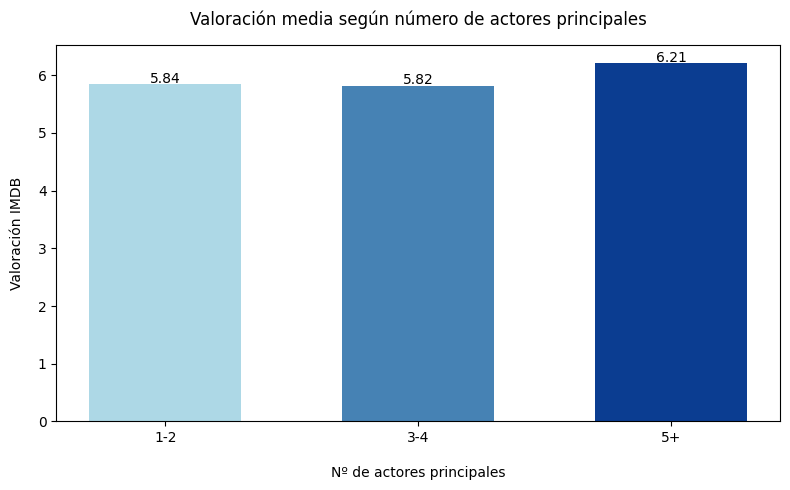

In [ ]:
# Definimos los datos
grupos = media_por_grupo['g_act']
medias = media_por_grupo['vot_av']

# Paleta de azules claros a oscuros
colores = ['#ADD8E6', '#4682B4', '#0B3D91']

# Crear gráfico de barras con colores personalizados
plt.figure(figsize=(8, 5))
plt.bar(grupos, medias, color=colores, width=0.6)

# Añadir etiquetas y título con separación mejorada
plt.title("Valoración media según número de actores principales", pad=15)
plt.xlabel("Nº de actores principales", labelpad=15)
plt.ylabel("Valoración IMDB", labelpad=10)

# Mostrar valores sobre cada barra
for i, valor in enumerate(medias):
    plt.text(i, valor + 0.03, f"{valor:.2f}", ha='center', fontsize=10)

plt.tight_layout()
plt.show()
